MADE BY MANAV MANGUKIYA

In [1]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


**TRAINING/TESTING MODEL**

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [11]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [12]:
dataset_dir="CNN-Dataset"

In [13]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath

CNN-Dataset ['COVID', 'Normal', 'test', 'train', 'val', 'Viral Pneumonia'] []
CNN-Dataset\COVID [] ['COVID-1.png', 'COVID-10.png', 'COVID-100.png', 'COVID-1000.png', 'COVID-1001.png', 'COVID-1002.png', 'COVID-1003.png', 'COVID-1004.png', 'COVID-1005.png', 'COVID-1006.png', 'COVID-1007.png', 'COVID-1008.png', 'COVID-1009.png', 'COVID-101.png', 'COVID-1010.png', 'COVID-1011.png', 'COVID-1012.png', 'COVID-1013.png', 'COVID-1014.png', 'COVID-1015.png', 'COVID-1016.png', 'COVID-1017.png', 'COVID-1018.png', 'COVID-1019.png', 'COVID-102.png', 'COVID-1020.png', 'COVID-1021.png', 'COVID-1022.png', 'COVID-1023.png', 'COVID-1024.png', 'COVID-1025.png', 'COVID-1026.png', 'COVID-1027.png', 'COVID-1028.png', 'COVID-1029.png', 'COVID-103.png', 'COVID-1030.png', 'COVID-1031.png', 'COVID-1032.png', 'COVID-1033.png', 'COVID-1034.png', 'COVID-1035.png', 'COVID-1036.png', 'COVID-1037.png', 'COVID-1038.png', 'COVID-1039.png', 'COVID-104.png', 'COVID-1040.png', 'COVID-1041.png', 'COVID-1042.png', 'COVID-104

In [14]:
#initialize the list of image data and target labels
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'} #dictionary to map file label name with target label name

In [15]:
for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 
    
    data.append(image)
    target.append(dic[label])

 96%|█████████▌| 19136/19902 [02:12<01:02, 12.31it/s] 

In [ ]:
print(len(data)) 

19902


In [ ]:
df=pd.DataFrame(target,columns=['labels'])
sns.countplot(df['labels'])
plt.show()

ValueError: could not convert string to float: 'Covid-19'

In [ ]:
size=[]
for file in imgpath: 
    img=plt.imread(file) 
    size.append(img.shape) 
pd.Series(size).value_counts() 

(299, 299)       19622
(299, 299, 3)      280
Name: count, dtype: int64

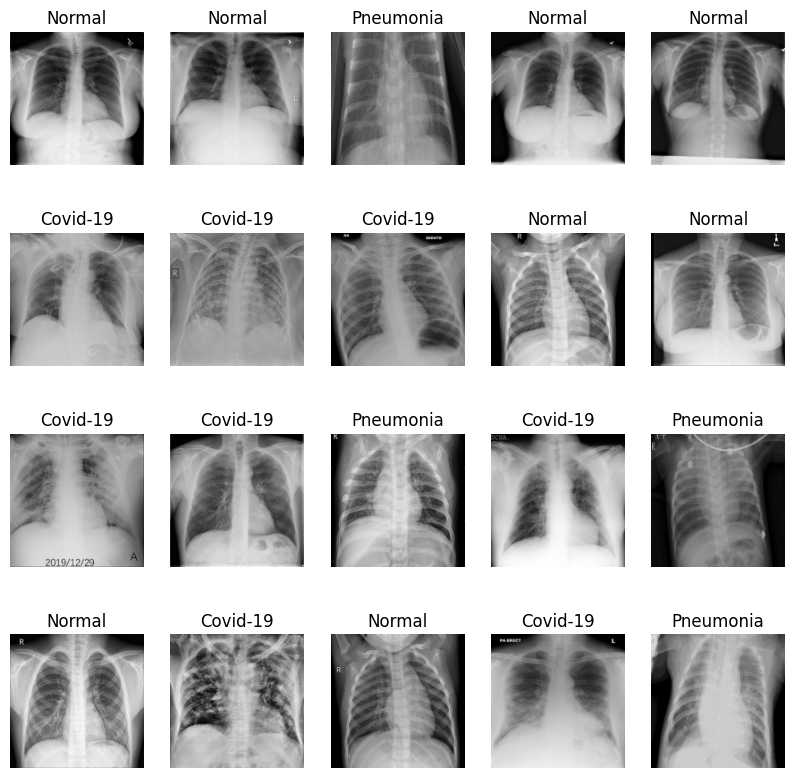

In [ ]:
plt.figure(figsize=(10,10)) 
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : 
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [ ]:
le=LabelEncoder() 
labels=le.fit_transform(target)
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [ ]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

MemoryError: Unable to allocate 8.01 GiB for an array with shape (15921, 150, 150, 3) and data type float64

In [ ]:
trainX[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.10196078, 0.10196078, 0.10196078],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.11764706, 0.11764706, 0.11764706],
        [0.09019608, 0.09019608, 0.09019608],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.08235294, 0.08235294, 0.08235294],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [ ]:
data=[]

In [ ]:
imgpath=[]

In [ ]:
df=[]

In [ ]:
size=[]

In [ ]:
epochs=20
batch_size=64

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

NameError: name 'model' is not defined

In [ ]:
model.save('CPN_Model.h5')

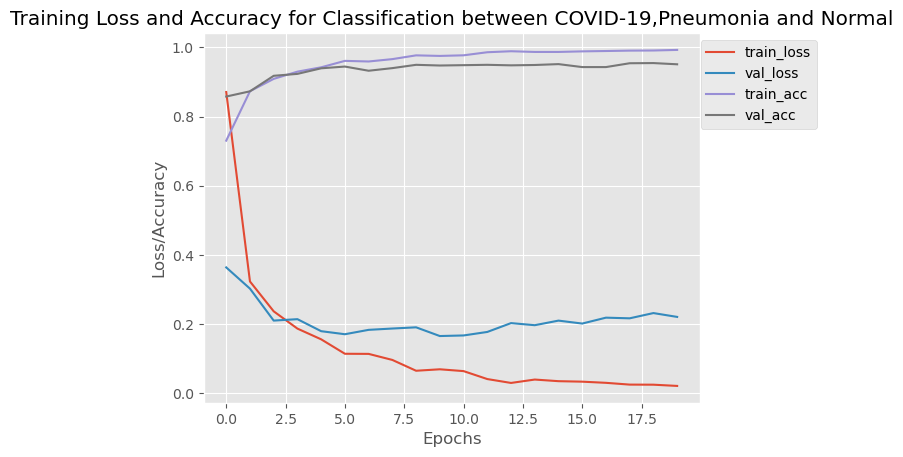

In [ ]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [ ]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.22098308801651
Test Accuracy is: 0.9507784843444824


In [ ]:
modelLoss=[]

In [ ]:
modelAccuracy=[]

In [ ]:
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

125/125 [==============================] - 40s 309ms/step
              precision    recall  f1-score   support

    Covid-19      0.997     0.999     0.998      2892
      Normal      0.999     0.997     0.998      3992
   Pneumonia      0.998     0.998     0.998      1076

    accuracy                          0.998      7960
   macro avg      0.998     0.998     0.998      7960
weighted avg      0.998     0.998     0.998      7960



In [ ]:
predIdxs=[]

In [ ]:
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

32/32 [==============================] - 8s 237ms/step
              precision    recall  f1-score   support

    Covid-19      0.936     0.964     0.950       724
      Normal      0.960     0.946     0.953       998
   Pneumonia      0.958     0.933     0.945       269

    accuracy                          0.951      1991
   macro avg      0.951     0.948     0.949      1991
weighted avg      0.951     0.951     0.951      1991



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[698  24   2]
 [ 45 944   9]
 [  3  15 251]]


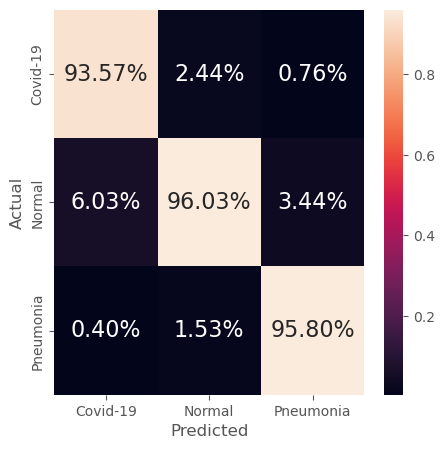

In [ ]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

**PREDICTING THE OUTPUT**

In [ ]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('CPN_Model.h5')

In [ ]:
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
#image paths
covid_img_path="CNN-Dataset/COVID/COVID-19.png"
normal_img_path="CNN-Dataset/Normal/Normal-500.png"
pneumonia_img_path="CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path]

In [ ]:
print(img_paths)

['CNN-Dataset/COVID/COVID-19.png', 'CNN-Dataset/Normal/Normal-500.png', 'CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png']


In [ ]:
resize=150

images=[]

for img_path in img_paths:
  img_path=cv2.imread(img_path)
  img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB) 
  img_path=cv2.resize(img_path, (resize, resize)) /255
  images.append(img_path)

In [ ]:
count=0
for _ in images:
  images[count]=np.array(images[count])
  images[count]=np.expand_dims(images[count], axis=0)
  print(images[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [ ]:
prediction=[]
for i in images:
  prediction.append(model.predict(i))

1/1 [==============================] - 0s 31ms/step


In [ ]:
output=[]
for p in prediction:
  output.append(np.argmax(p,axis=1))

In [ ]:
#0: COVID-19
#1: Normal
#2: Pneumonia

title=[]

for out in output:
  if out==0:
    title.append('COVID-19')
  elif out==1:
    title.append('Normal')
  else:
    title.append('Pneumonia')

print(title)

['COVID-19', 'Normal', 'Pneumonia']


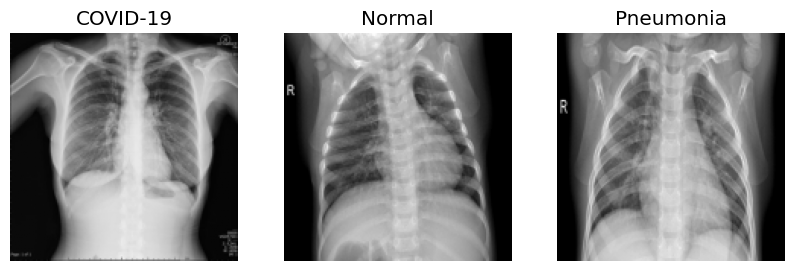

In [ ]:
#printing the images with predicted output
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
  plt.subplot(1,3,i+1)
  plt.imshow(np.squeeze(img) , cmap='gray')
  plt.title(title[i])
  plt.axis('off')  
  i+=1   
plt.show()